# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Task 1- Prediction Using Supervised ML


# Problem: Predict the % of a student based on the no. of study hours.

Author: Lucky Agarwal
Copyright Lucky Agarwal, 2021

In [2]:
# importing important libraries


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error


In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# the shape of given data set is ;
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

HOURS  IS OUR INDEPENDENT COLUMN
SCORE IS OUR TARGET COLUMN

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
#SCORES is slightly right skewed as mean value is higher than median

In [14]:
#checking skewness
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

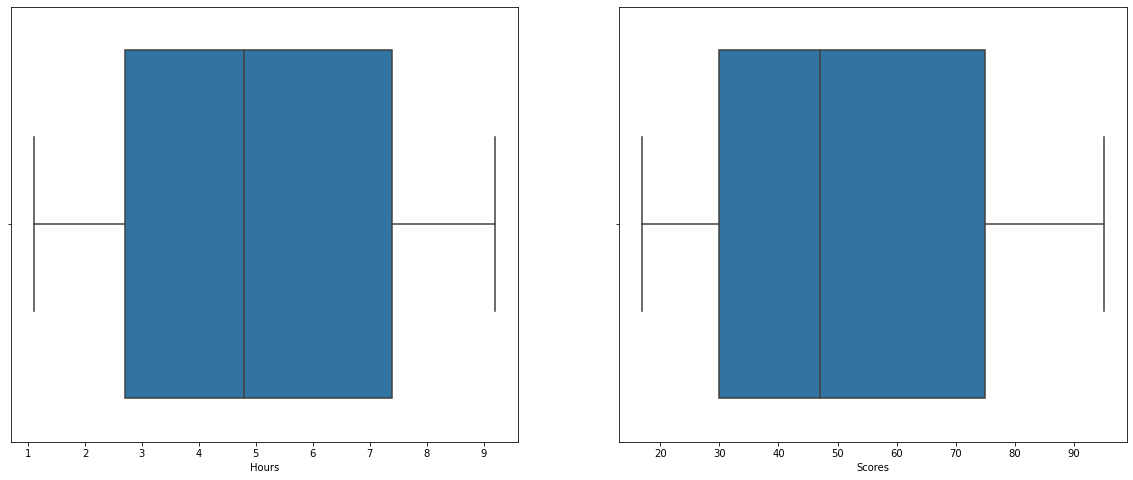

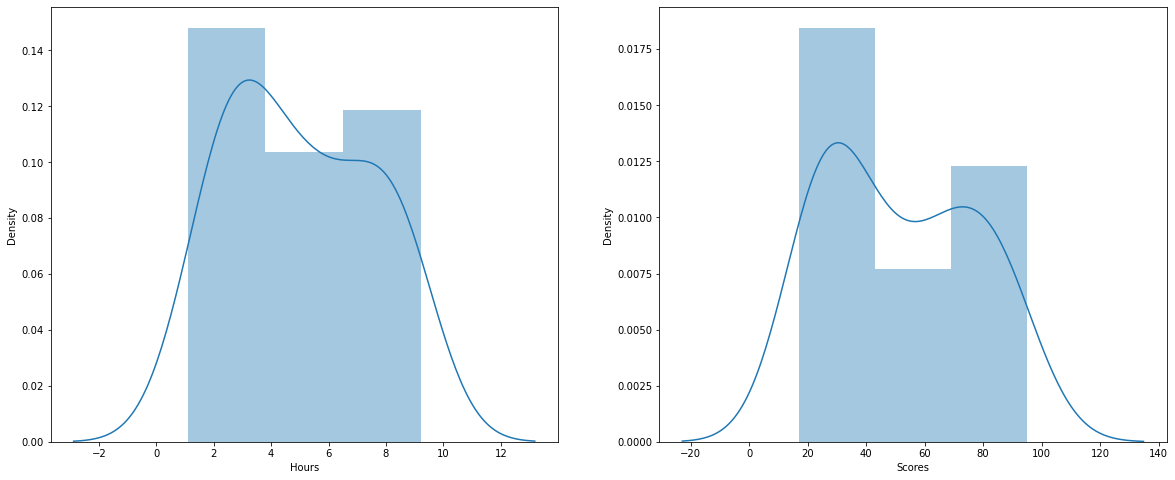

In [28]:
plt.rcParams['figure.figsize']=(20,8)
fig,a=plt.subplots(1,2)
sns.boxplot(df['Hours'],ax=a[0])
sns.boxplot(df['Scores'],ax=a[1])
plt.show()
print('\n')
plt.rcParams['figure.figsize']=(20,8)
fig,a=plt.subplots(1,2)
sns.distplot(df['Hours'],ax=a[0])
sns.distplot(df['Scores'],ax=a[1])
plt.show()

no outliers are there 
so that slight skewness can be ignored
distribution close to symmetric

In [7]:
# AS THE COUNT WAS 25 ,SO NULL VALUES PRESENT:FOR CONFIRMATION
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
# there is a high correlation between the two columns suggesting the score can be accurately predicted by using hours column
# though many other factor may also contibute

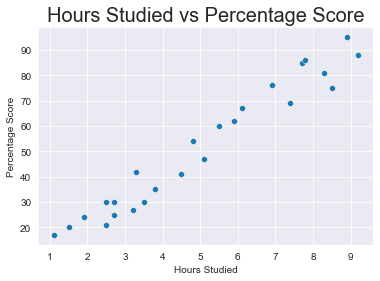

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y=df['Scores'],x=df['Hours'])
plt.title('Hours Studied vs Percentage Score',size=20)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

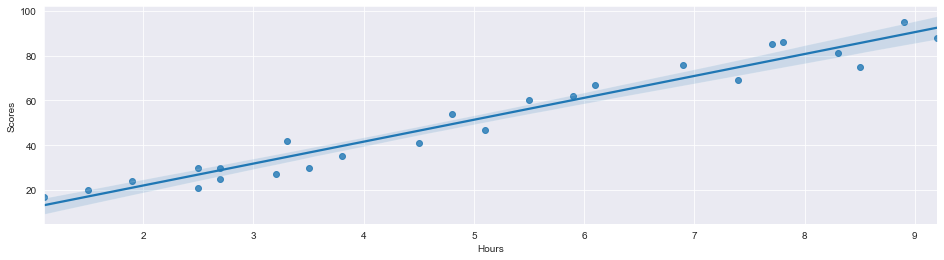

In [5]:
plt.rcParams['figure.figsize'] = (16,4)
sns.regplot(df['Hours'],df['Scores'])
plt.show()


there is strong positive correlation between the hours of study and percencetage of score secured

# data preparation

In [7]:
X=df.drop('Scores',1)
y=df['Scores']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

print('X Train shape: ',x_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Train shape: ',y_train.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (17, 1)
X Test shape:  (8, 1)
Y Train shape:  (17,)
Y Test shape:  (8,)


# Model Building

In [9]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
print('model built')
print('\n')

y_pred_test=model.predict(x_test)
print(y_pred_test)
print('\n')
y_pred_train=model.predict(x_train)
print(y_pred_train)

model built


[ 9.93952968 32.84320126 18.26813752 86.97915227 48.45934097 78.65054442
 61.99332873 75.52731648]


[34.92535322 31.80212528 26.59674537 94.26668414 55.74687284 38.04858116
 51.58256892 24.51459341 24.51459341 91.1434562  79.6916204  70.32193658
 26.59674537 84.89700031 45.33611303 59.91117676 14.1038336 ]


# prediction
The actual values were compared with predicted values.

In [10]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


In [11]:
# lets try to predict certain value 
hours = 9.25
pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.78722212956563


# Model Evaluation
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [12]:
print('Model performance on Train data')
mean_squ_error_train = mean_squared_error(y_train, y_pred_train)
mean_abs_error_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Squred Error:",mean_squ_error_train)
print("Mean absolute Error:",mean_abs_error_train)
print('\n')
print('Model performance on Test data')
mean_squ_error_test = mean_squared_error(y_test,y_pred_test)
mean_abs_error_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Squred Error:",mean_squ_error_test)
print("Mean absolute Error:",mean_abs_error_test)

Model performance on Train data
Mean Squred Error: 20.680761366041246
Mean absolute Error: 4.349384098544232


Model performance on Test data
Mean Squred Error: 56.092330905646705
Mean absolute Error: 7.169048271425507


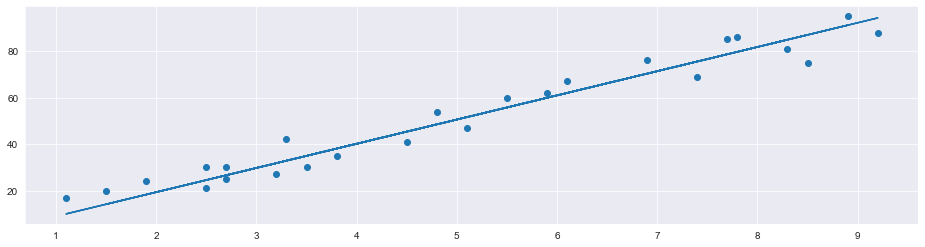

In [13]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()